## Stock price Prediction and Forecasting Using Stacked LSTM

In [1]:
import pandas_datareader as pdr

In [2]:
# get the key from tiingo authentication
key = '90a95cd170047b9b0e04a518dd5672fb4419ccf7'

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key = key)

In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd
df = pd.read_csv('AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-06-23 00:00:00+00:00,96.10,96.290,95.25,95.94,32240187,22.440642,22.485010,22.242156,22.403280,128960748,0.0,1.0
1,AAPL,2016-06-24 00:00:00+00:00,93.40,94.655,92.65,92.91,75311356,21.810156,22.103215,21.635021,21.695734,301245424,0.0,1.0
2,AAPL,2016-06-27 00:00:00+00:00,92.04,93.050,91.50,93.00,46622188,21.492578,21.728426,21.366480,21.716751,186488752,0.0,1.0
3,AAPL,2016-06-28 00:00:00+00:00,93.59,93.660,92.14,92.90,40444914,21.854524,21.870870,21.515929,21.693399,161779656,0.0,1.0
4,AAPL,2016-06-29 00:00:00+00:00,94.40,94.550,93.63,93.97,36531006,22.043669,22.078696,21.863864,21.943259,146124024,0.0,1.0


In [6]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-06-15 00:00:00+00:00,129.64,130.60,129.390,129.94,62746332,129.64,130.60,129.390,129.94,62746332,0.0,1.0
1253,AAPL,2021-06-16 00:00:00+00:00,130.15,130.89,128.461,130.37,91339351,130.15,130.89,128.461,130.37,91339351,0.0,1.0
1254,AAPL,2021-06-17 00:00:00+00:00,131.79,132.55,129.650,129.80,96721669,131.79,132.55,129.650,129.80,96721669,0.0,1.0
1255,AAPL,2021-06-18 00:00:00+00:00,130.46,131.51,130.240,130.71,108953309,130.46,131.51,130.240,130.71,108953309,0.0,1.0
1256,AAPL,2021-06-21 00:00:00+00:00,132.30,132.41,129.210,130.30,79663316,132.30,132.41,129.210,130.30,79663316,0.0,1.0


Here we have the data from 2016 to present 2021-06-21 of Apple stock price

In [7]:
df.shape

(1257, 14)

In [8]:
# first pick the close column

df1 = df.reset_index()['close']
df1

0        96.10
1        93.40
2        92.04
3        93.59
4        94.40
         ...  
1252    129.64
1253    130.15
1254    131.79
1255    130.46
1256    132.30
Name: close, Length: 1257, dtype: float64

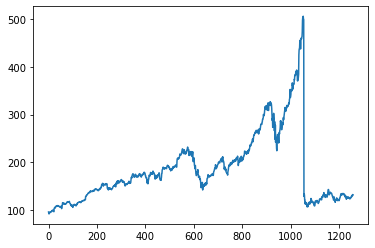

In [9]:
## plot the data
import matplotlib.pyplot as plt
plt.plot(df1)

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.00980558]
 [0.00328463]
 [0.        ]
 ...
 [0.0960029 ]
 [0.09279073]
 [0.09723463]]


MinMaxScaler prints the value from 0 to 1

### Train test split
Incase of TimeSeries Data we should divide the data based on dates

Timeseries data = 120,130,125,140,150,160,170,190,154

Train_data - 120,130,125,140,150,160

Test_data - 170,190,154

Timesteps = 3, to divide data into independent and dependent features

In [11]:
# splitting data into train and test split
## taking 65% of the total length of dataframe as training data
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data=df1[0:training_size, :],df1[training_size:len(df1),:1]

In [12]:
training_size, test_size

(817, 440)

In [13]:
print(train_data)
len(train_data)

[[0.00980558]
 [0.00328463]
 [0.        ]
 [0.00374351]
 [0.00569979]
 [0.008598  ]
 [0.00929839]
 [0.00712474]
 [0.00842893]
 [0.00941915]
 [0.01120638]
 [0.01193093]
 [0.0129936 ]
 [0.01166526]
 [0.01630238]
 [0.01627823]
 [0.01881415]
 [0.01891076]
 [0.01912812]
 [0.01784809]
 [0.01598841]
 [0.01280039]
 [0.01118222]
 [0.02634947]
 [0.02970656]
 [0.02939259]
 [0.03383649]
 [0.03004468]
 [0.03320855]
 [0.03340176]
 [0.03729018]
 [0.03943968]
 [0.04050235]
 [0.03854607]
 [0.03837701]
 [0.0389808 ]
 [0.04212052]
 [0.041879  ]
 [0.04149257]
 [0.04115445]
 [0.0418307 ]
 [0.0397778 ]
 [0.04059896]
 [0.03861852]
 [0.03750755]
 [0.03598599]
 [0.03569617]
 [0.03371573]
 [0.03395725]
 [0.03547881]
 [0.03789397]
 [0.03782152]
 [0.03941553]
 [0.03255645]
 [0.0267842 ]
 [0.03236324]
 [0.03842531]
 [0.04765125]
 [0.05682889]
 [0.05525903]
 [0.0520227 ]
 [0.05199855]
 [0.05195025]
 [0.05453448]
 [0.04992151]
 [0.05033209]
 [0.05083927]
 [0.05291631]
 [0.04864147]
 [0.05074266]
 [0.04946263]
 [0.05

817

In [14]:
print(test_data)
len(test_data)

[[0.30595339]
 [0.30344161]
 [0.31153242]
 [0.30877913]
 [0.3061949 ]
 [0.31863302]
 [0.32013042]
 [0.30653303]
 [0.31102524]
 [0.32597512]
 [0.32609588]
 [0.31967154]
 [0.32602343]
 [0.33341384]
 [0.34819466]
 [0.34737351]
 [0.34604516]
 [0.34375075]
 [0.34594856]
 [0.3486777 ]
 [0.35857988]
 [0.35725154]
 [0.36502838]
 [0.36599445]
 [0.37323995]
 [0.37920541]
 [0.36529405]
 [0.36522159]
 [0.37850501]
 [0.39555609]
 [0.39961357]
 [0.39871996]
 [0.39898563]
 [0.40427485]
 [0.40598961]
 [0.41096486]
 [0.41038522]
 [0.41644729]
 [0.41202753]
 [0.41956285]
 [0.42279918]
 [0.42084289]
 [0.41335587]
 [0.41050598]
 [0.40995049]
 [0.42103611]
 [0.41601256]
 [0.4245864 ]
 [0.42316145]
 [0.41569859]
 [0.40432315]
 [0.40985388]
 [0.41912812]
 [0.43151793]
 [0.42236445]
 [0.42613211]
 [0.43166284]
 [0.43332931]
 [0.44224128]
 [0.45361671]
 [0.45494505]
 [0.45332689]
 [0.45400314]
 [0.45260234]
 [0.46361551]
 [0.4642676 ]
 [0.47788914]
 [0.47762348]
 [0.48177756]
 [0.48692187]
 [0.50310349]
 [0.49

440

In [15]:
import numpy as np
## convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [16]:
## reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [17]:
print(X_train)

[[0.00980558 0.00328463 0.         ... 0.04550175 0.03803888 0.03958459]
 [0.00328463 0.         0.00374351 ... 0.03803888 0.03958459 0.03301534]
 [0.         0.00374351 0.00569979 ... 0.03958459 0.03301534 0.03639657]
 ...
 [0.27349354 0.27112668 0.27187538 ... 0.31650767 0.30602584 0.30880328]
 [0.27112668 0.27187538 0.26235962 ... 0.30602584 0.30880328 0.31073542]
 [0.27187538 0.26235962 0.28614902 ... 0.30880328 0.31073542 0.31573481]]


In [18]:
X_train.shape, y_train.shape

((716, 100), (716,))

In [19]:
X_test.shape, y_test.shape

((339, 100), (339,))

In [20]:
## reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1) 

### Create the Stacked LSTM Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model = Sequential()
# Stacked LSTM one after another

model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


### Fit the model 

In [25]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 5s 401ms/step - loss: 0.0117 - val_loss: 0.0417
Epoch 2/100
12/12 [==============================] - 3s 221ms/step - loss: 0.0027 - val_loss: 0.0270
Epoch 3/100
12/12 [==============================] - 3s 231ms/step - loss: 0.0016 - val_loss: 0.0293
Epoch 4/100
12/12 [==============================] - 2s 200ms/step - loss: 9.5077e-04 - val_loss: 0.0217
Epoch 5/100
12/12 [==============================] - 2s 199ms/step - loss: 5.8739e-04 - val_loss: 0.0192
Epoch 6/100
12/12 [==============================] - 2s 205ms/step - loss: 4.3171e-04 - val_loss: 0.0195
Epoch 7/100
12/12 [==============================] - 3s 241ms/step - loss: 4.3005e-04 - val_loss: 0.0188
Epoch 8/100
12/12 [==============================] - 2s 204ms/step - loss: 3.9871e-04 - val_loss: 0.0184
Epoch 9/100
12/12 [==============================] - 2s 197ms/step - loss: 3.9021e-04 - val_loss: 0.0182
Epoch 10/100
12/12 [==============================] - 2s 197ms/step

12/12 [==============================] - 2s 201ms/step - loss: 1.3650e-04 - val_loss: 0.0092
Epoch 79/100
12/12 [==============================] - 2s 199ms/step - loss: 1.3951e-04 - val_loss: 0.0083
Epoch 80/100
12/12 [==============================] - 2s 199ms/step - loss: 1.4189e-04 - val_loss: 0.0083
Epoch 81/100
12/12 [==============================] - 2s 200ms/step - loss: 1.2643e-04 - val_loss: 0.0082
Epoch 82/100
12/12 [==============================] - 2s 198ms/step - loss: 1.2886e-04 - val_loss: 0.0085
Epoch 83/100
12/12 [==============================] - 2s 203ms/step - loss: 1.3201e-04 - val_loss: 0.0078
Epoch 84/100
12/12 [==============================] - 4s 333ms/step - loss: 1.3849e-04 - val_loss: 0.0076
Epoch 85/100
12/12 [==============================] - 2s 199ms/step - loss: 1.2032e-04 - val_loss: 0.0073
Epoch 86/100
12/12 [==============================] - 2s 199ms/step - loss: 1.3109e-04 - val_loss: 0.0072
Epoch 87/100
12/12 [==============================] - 2s 19

### Do the prediction and check for performance metrics

In [26]:
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

In [27]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [28]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

### calculate the RMSE performance metrics

In [29]:
print(math.sqrt(mean_squared_error(y_train, train_predict)))
print(math.sqrt(mean_squared_error(y_test, test_predict)))

174.93823391419699
232.0617035403291


### Plot the stock price prediction

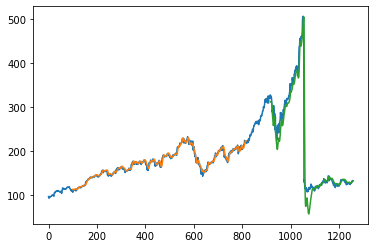

In [30]:
# train prediction for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# test prediction for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()